# Task 2
A team of plantation planners are concerned about the yield of oil palm trees, which seems to
fluctuate. They have collected a set of data and needed help in analysing on how external
factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of
oil palm tree determines the FFB yield, and are linked to the external factors. Perform the
analysis, which requires some study on the background of oil palm tree physiology.

In [1]:
#Import all the neccessary frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# might be needed depending on your version of Jupyter
%matplotlib inline
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Read the csv using pandas
df = pd.read_csv('../PreScreen_r3/palm_ffb.csv')
df.head(10)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
5,01.06.2008,532.5,27.116667,21.4,35.5,182.3,24,829817.5676,1.48
6,01.07.2008,544.7,27.035484,21.2,33.9,201.6,26,814475.3012,1.66
7,01.08.2008,569.9,27.200000,21.7,34.5,283.2,26,782279.5322,1.71
8,01.09.2008,571.7,27.556667,21.2,35.1,176.3,25,795237.6543,1.62
9,01.10.2008,565.3,27.358065,22.1,33.9,217.5,24,765090.8602,1.86


In [3]:
#Check the shape
df.shape

(130, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [5]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [6]:
#Check for any null values under an entire DataFrame
df.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

In [7]:
# Find skewness and Kurtosis
d_skew = df.skew() 
d_kurt = df.kurt()

frame = { 'Skewness': d_skew, 'Kurtosis': d_kurt } 
  
df_skew_kurt = pd.DataFrame(frame)
df_skew_kurt

/tmp/ipykernel_8164/2297238109.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d_skew = df.skew()
/tmp/ipykernel_8164/2297238109.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d_kurt = df.kurt()


,Skewness,Kurtosis
SoilMoisture,-0.394336,-0.262867
Average_Temp,-0.340606,0.141138
Min_Temp,-1.121358,2.000500
Max_Temp,-0.215635,-0.591251
Precipitation,0.526227,1.206761
Working_days,-0.660814,0.565301
HA_Harvested,-0.064445,0.085981
FFB_Yield,0.188629,-0.670960


/tmp/ipykernel_8164/3357356452.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.skew(),color='blue',axlabel ='Skewness')
/home/lauvindra/anaconda3/envs/lau/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


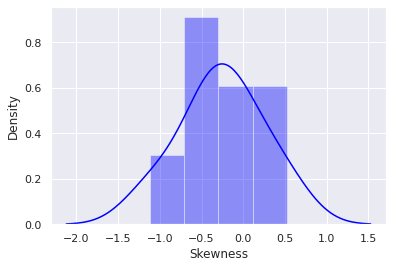

In [8]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')
plt.show()

/tmp/ipykernel_8164/1735537922.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
/home/lauvindra/anaconda3/envs/lau/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


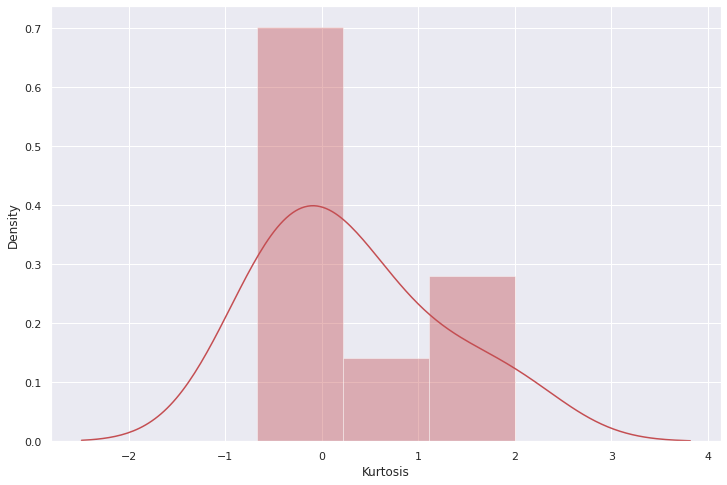

In [9]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

## Findings
* Data contains all numerical columns
* No issues of skewness and kurtosis

In [10]:
# List of all the numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']

In [11]:
num_vars

['SoilMoisture',
 'Average_Temp',
 'Min_Temp',
 'Max_Temp',
 'Precipitation',
 'Working_days',
 'HA_Harvested',
 'FFB_Yield']

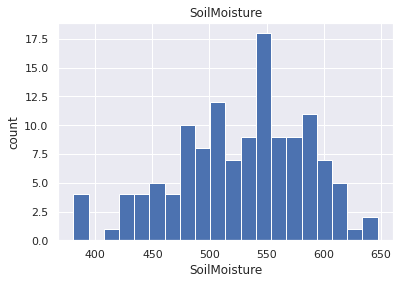

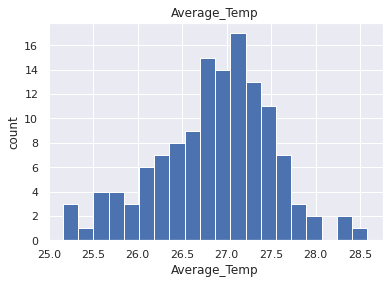

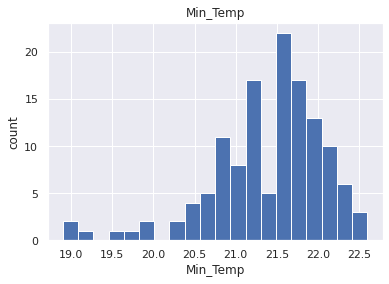

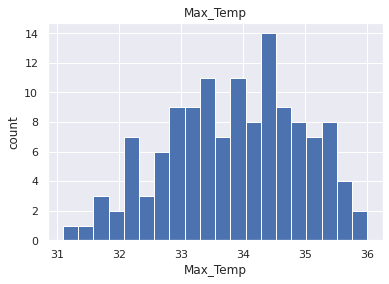

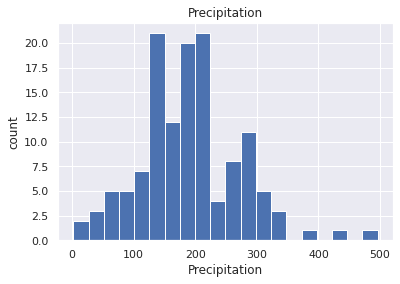

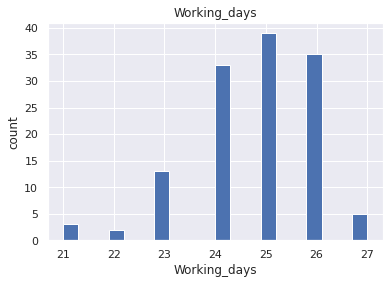

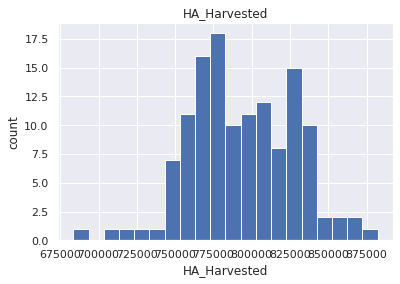

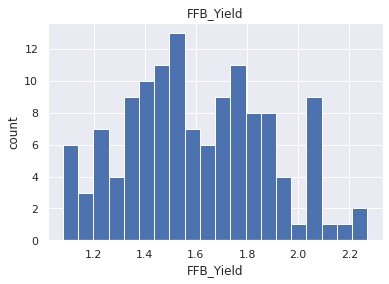

In [12]:
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(df, var)

* Working days looks discreate than other variable
* min_temp is negatively skewed

In [13]:
# let's visualise the discrete variables
df['Working_days'].head()

0    25
1    23
2    25
3    25
4    25
Name: Working_days, dtype: int64

In [14]:
df['Working_days'].describe()

count    130.000000
mean      24.753846
std        1.239289
min       21.000000
25%       24.000000
50%       25.000000
75%       26.000000
max       27.000000
Name: Working_days, dtype: float64

<AxesSubplot:xlabel='Working_days', ylabel='count'>

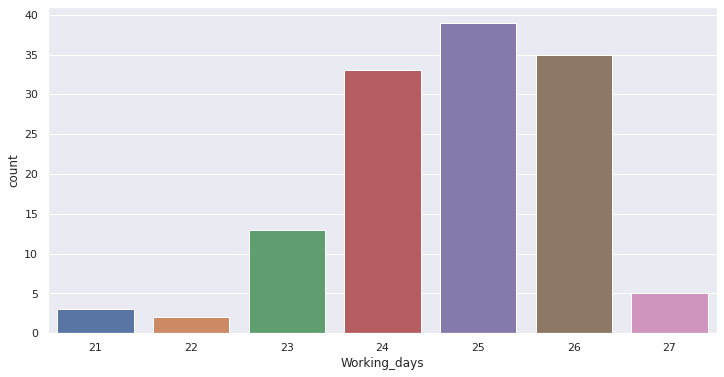

In [15]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Working_days', data = df)

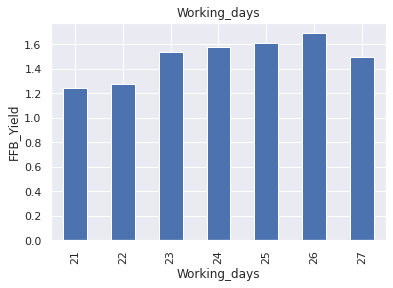

In [16]:
df = df.copy()
df.groupby('Working_days')['FFB_Yield'].median().plot.bar()
plt.title('Working_days')
plt.ylabel('FFB_Yield')
plt.show()

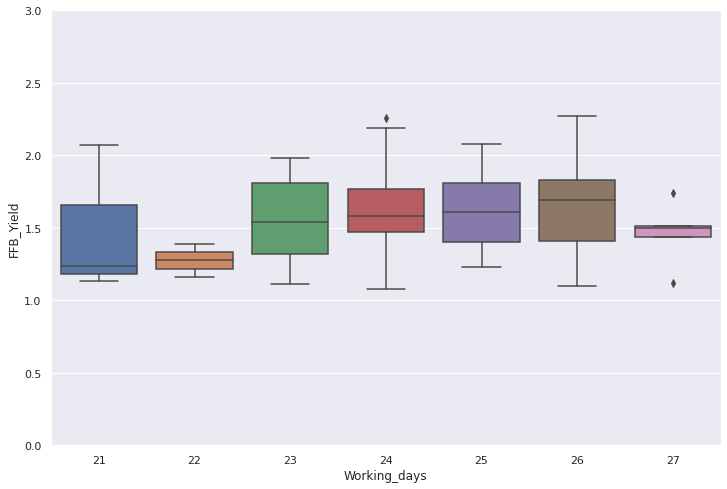

In [17]:
var = 'Working_days'
data_working_days = pd.concat([df['FFB_Yield'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="FFB_Yield", data=data_working_days)
fig.axis(ymin=0, ymax=3);

* The higher the working days, the higher the FFB Yield except the highest days which is 27
* Maximum yield is generated when working days are equal to 26

In [18]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


Dataset contains of continious variables except 

In [19]:
cont_vars = df.drop(['Date', 'Working_days'], axis=1)

In [20]:
cont_vars.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,813659.7222,1.44


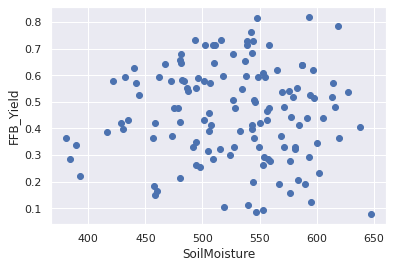

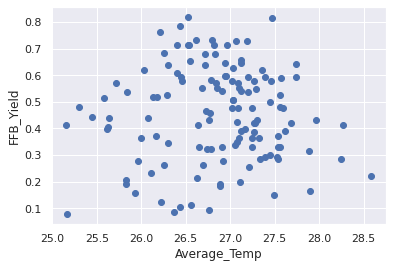

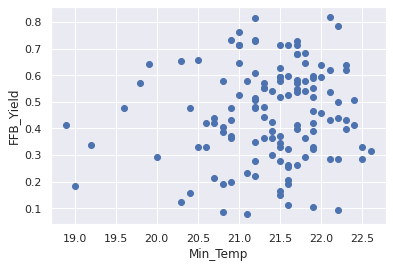

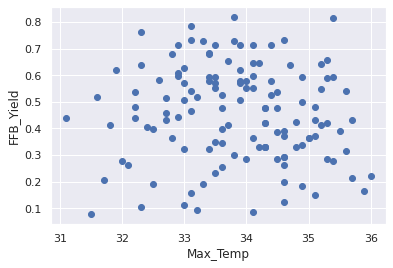

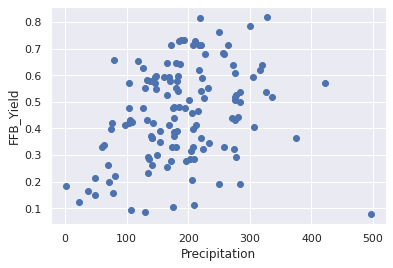

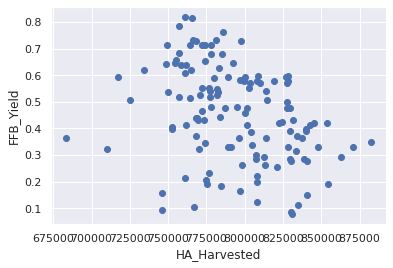

In [21]:
# let's explore the relationship between the FFB Yield and the transformed variables
# with more detail
def non_transform_analyse_continous(df, var):
    df = df.copy()
    df['FFB_Yield'] = np.log(df['FFB_Yield'])
    plt.scatter(df[var], df['FFB_Yield'])
    plt.ylabel('FFB_Yield')
    plt.xlabel(var)
    plt.show()

for var in cont_vars:
    if var !='FFB_Yield':
        non_transform_analyse_continous(df, var)

* A clear linear relationship can be observed between FFB Yield and Precipitation feature. As one increases so does the other

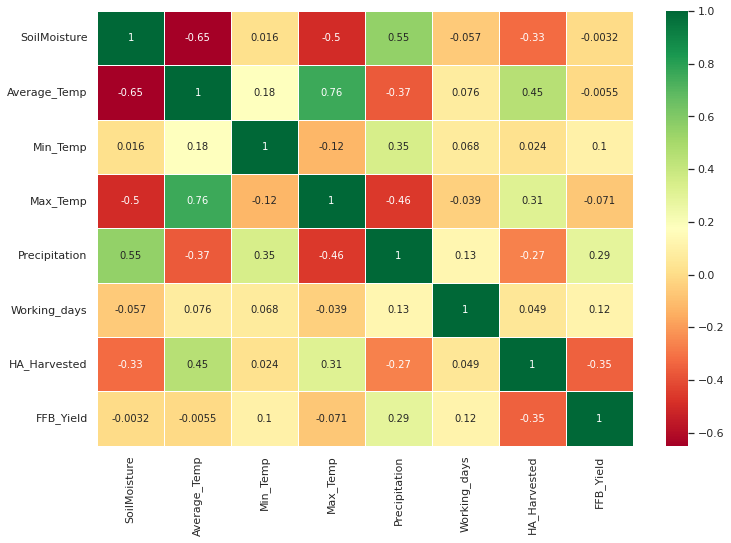

In [22]:
# We use heatmap to check the correlation between datas
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

* Correlation is a measure of how strong a relationship between two variables


* Positive Correlation: both variables change in the same direction
* Neutral Correlation: No relationship in the change of the variables
* Negative Correlation: variables change in opposite directions

* From the above heatmap we can know precipitation and soil moisture are highly correlated.
* We can remove either one to perform any machine learning work because both of it have similar information
* FFB Yield shows strong negative correlation with HA_Harvested and strong positive correlation with min_temp, working days and precipitation.

In [23]:
X = df.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = df.FFB_Yield    #Dependant Variable

In [24]:
# We are going to use random forest regressor
# forward = True (This is a forward selection model)
# verbose=2 (It will show details output as shown below)
# cv=5 (cross validation split to training set 4 and testing set 1)
# n_jobs=-1(-1 means it will use all the cores of CPU for execution)
# 'r2'score(Measure how close the data are fitted to the regression line)
model=sfs(RandomForestRegressor(),k_features=4,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    2.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.5s finished

[2022-08-08 10:36:34] Features: 1/4 -- score: -0.1387974670966435[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.3s finished

[2022-08-08 10:36:35] Features: 2/4 -- score: -0.18945790573977392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished

[2022-08-08 10:36:36] Features: 3/4 -- score: 0.08654877403762935[Parallel(n_jobs=-1)]: Using backend

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=4,
                          n_jobs=-1, scoring='r2', verbose=2)

In [25]:
#Get the selected feature index.
model.k_feature_idx_

(0, 4, 5, 6)

In [26]:
#Get the column name for the selected feature.
model.k_feature_names_

('SoilMoisture', 'Precipitation', 'Working_days', 'HA_Harvested')

In [27]:
backwardModel=sfs(RandomForestRegressor(),k_features=4,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
#We will convert our training data into numpy array. If we will not convert it, model is not able to read some of the column names. 
backwardModel.fit(np.array(X),y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    1.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.1s finished

[2022-08-08 10:36:39] Features: 6/4 -- score: 0.22548966699809253[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.2s finished

[2022-08-08 10:36:40] Features: 5/4 -- score: 0.2735130868715664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished

[2022-08-08 10:36:41] Features: 4/4 -- score: 0.2996947502952801

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=4, n_jobs=-1, scoring='r2', verbose=2)

In [28]:
#Get the selected feature index.
backwardModel.k_feature_idx_

(0, 2, 4, 6)

In [29]:
#Get the column name for the selected feature.
X.columns[list(backwardModel.k_feature_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'HA_Harvested'], dtype='object')

## Findings
We see Soil Moisture and Working_days doing well together with Precipitaion and HA_Harvested.

In [30]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
#min_features=1 (minimum number of feature)
#max_features=5 (maximum number of feature)
emodel=efs(RandomForestRegressor(),min_features=1,max_features=7,scoring='r2',n_jobs=-1)
miniData=X[X.columns]
emodel.fit(np.array(miniData),y)

Features: 127/127

ExhaustiveFeatureSelector(estimator=RandomForestRegressor(), max_features=7,
                          n_jobs=-1, scoring='r2')

In [31]:
#Get the selected feature index.
emodel.best_idx_

(0, 2, 3, 4, 5, 6)

In [32]:
#Get the column name for the selected feature.
miniData.columns[list(emodel.best_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days',
       'HA_Harvested'],
      dtype='object')

## Findings
Soil Moisture and Working_days are part of the best feature team together with Precipitaion, Min_Temp and HA_Harvested.